## Analysis Introduction

This analysis examines daily bike rental demand in the Chicago metropolitan area using historical rental, time, and weather data. The objective is to determine whether bike rentals are primarily used for commuting, leisure, or exercise, and to identify the key factors influencing rental demand. Exploratory data analysis is used to understand rental patterns across time and conditions. Predictive models, including linear regression and decision trees, are then developed to quantify these relationships. The results are intended to support data-driven decision making for transportation planning and maintenance scheduling.



In [ ]:
# Step 1: importing pandas

import pandas as pd
import warnings

# suppressing user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Step 2: storing the path to the dataset
file = "https://docs.google.com/spreadsheets/d/1HELEwf3V6T66lPn68RPpJ0qMPMbSyr7w/export?format=xlsx"

# Step 3: reading the file
bikerentals = pd.read_excel(file, engine='openpyxl')


# Step 4: checking results
bikerentals.head(n = 5)

,ID,Month,Day of Week,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,Seasons,Holiday,RENTALS
0,1,May,Monday,4,18.0,85,0.3,275,15.4,0.00,0.0,0.0,Spring,Yes,202
1,2,May,Monday,5,18.0,85,0.8,346,15.4,0.00,0.0,0.0,Spring,Yes,180
2,3,May,Monday,7,18.0,82,0.7,264,14.8,0.11,0.0,0.0,Spring,Yes,645
3,4,May,Monday,12,22.1,67,2.7,462,15.6,0.81,0.0,0.0,Spring,Yes,1447
4,5,May,Monday,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Yes,1675


In [ ]:
# Step 5: auditing data quality
bikerentals.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1381 non-null   int64  
 1   Month                  1381 non-null   object 
 2   Day of Week            1381 non-null   object 
 3   Hour                   1381 non-null   int64  
 4   Temperature            1381 non-null   float64
 5   Humidity               1381 non-null   int64  
 6   Wind Speed             1381 non-null   float64
 7   Visibility             1381 non-null   int64  
 8   Dew Point Temperature  1381 non-null   float64
 9   UV Index               1381 non-null   float64
 10  Rainfall               1381 non-null   float64
 11  Snowfall               1381 non-null   float64
 12  Seasons                1381 non-null   object 
 13  Holiday                1381 non-null   object 
 14  RENTALS                1381 non-null   int64  
dtypes: f

In [ ]:
# Step 6: descriptive statistics
bikerentals.describe().round(2)


,ID,Hour,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,UV Index,Rainfall,Snowfall,RENTALS
count,1381.0,1381.00,1381.00,1381.00,1381.00,1381.00,1381.00,1381.00,1381.00,1381.00,1381.00
mean,691.0,11.57,17.44,61.96,1.59,1465.16,9.26,0.60,0.18,0.06,966.62
std,398.8,6.88,10.60,20.21,0.97,610.70,11.45,0.89,1.34,0.40,731.85
min,1.0,0.00,-12.30,0.00,0.00,33.00,-25.20,0.00,0.00,0.00,5.00
25%,346.0,6.00,10.40,46.00,0.90,985.00,1.80,0.00,0.00,0.00,325.00
50%,691.0,12.00,20.00,61.00,1.40,1786.00,11.80,0.03,0.00,0.00,855.00
75%,1036.0,18.00,25.10,79.00,2.10,2000.00,19.00,1.00,0.00,0.00,1375.00
max,1381.0,23.00,38.00,98.00,6.90,2000.00,26.60,3.45,35.00,7.00,3734.00


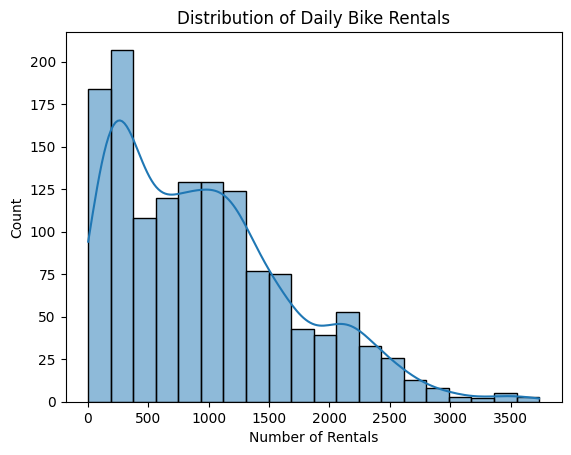

In [ ]:
# Step 7: importing packages for exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Step 8: distribution of bike rentals
sns.histplot(data = bikerentals,
             x    = 'RENTALS',
             kde  = True)

plt.title("Distribution of Daily Bike Rentals")
plt.xlabel("Number of Rentals")
plt.ylabel("Count")
plt.show()


The distribution of daily bike rentals is right-skewed, meaning that most days have a relatively low to moderate number of rentals, while a smaller number of days experience very high demand. The long right tail suggests that extreme rental counts occur less frequently but significantly increase the maximum observed values. The median rental level appears lower than the mean, which is consistent with a positively skewed distribution. This indicates that average rental demand is influenced by high-usage days rather than typical daily behavior. Overall, the distribution suggests that bike rentals vary substantially depending on external factors such as time and weather conditions.

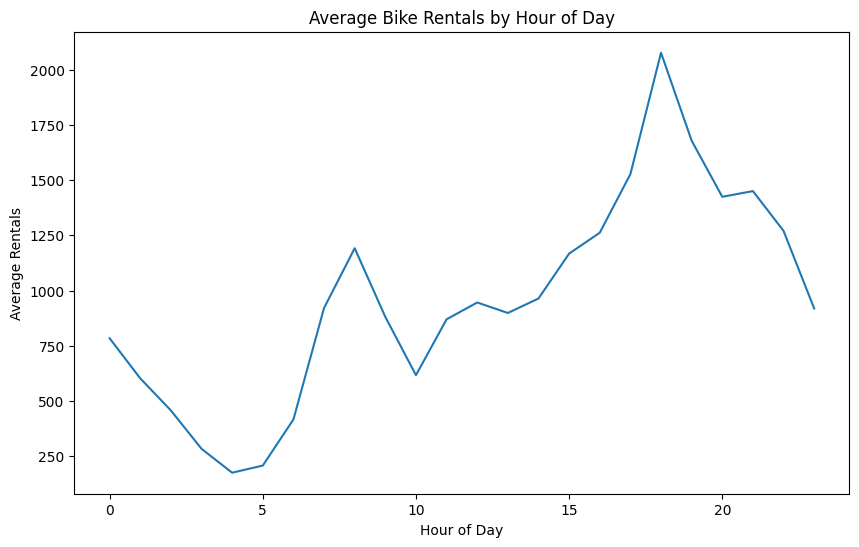

In [ ]:
# Step 9: average rentals by hour of day
hourly_avg = bikerentals.groupby('Hour')['RENTALS'].mean()

# plotting
plt.figure(figsize=(10,6))
hourly_avg.plot(kind='line')

plt.title("Average Bike Rentals by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rentals")
plt.show()

Average bike rentals show two clear peaks during the day, one in the morning and another in the late afternoon to early evening. These peaks align closely with typical commuting hours, suggesting that a large portion of bike rentals are used for travel to and from work. Rental activity is lowest during early morning hours and decreases again late at night, which is inconsistent with leisure-focused usage. While some mid-day rentals may be related to exercise or recreational activity, the dominant pattern reflects commuting behavior. Overall, the hourly distribution provides strong evidence that bike rentals are primarily driven by commuting demand.

## Analysis Task 1: Purpose of Bike Rentals

Based on the analysis, the majority of bike rentals appear to be used for commuting to work rather than for leisure or exercise. The hourly rental distribution shows two clear peaks during the morning and late afternoon to early evening, which closely align with standard commuting hours. In addition, rental demand is generally higher on weekdays than on weekends, further indicating work-related travel behavior. Leisure or exercise-oriented usage would be expected to show stronger mid-day or weekend demand, which is not the dominant pattern observed in the data. Together, these patterns suggest that bike rentals primarily function as a mode of daily transportation.

This conclusion is supported by external research analyzing Citi Bike usage in New York City. A 2025 study found that bike-share demand follows strong spatiotemporal patterns aligned with regular daily travel routines, indicating that bike sharing is commonly used for transportation purposes rather than purely recreational activity (Wen, Tian, & Wu, 2025).

### References

Wen, Z., Tian, D., & Wu, N. (2025). Modeling and Analyzing the Spatiotemporal Travel Patterns of Bike Sharing: A Case Study of Citi Bike in New York. *Sustainability, 17*(1), 14. https://doi.org/10.3390/su17010014




In [ ]:
# Step 10: selecting x and y variables for the regression tree

# x-data (weather-related variables only)
x_data = bikerentals[['Humidity', 'Wind Speed', 'Rainfall', 'Temperature']]

# y-data
y_data = bikerentals['RENTALS']

# Step 11: train-test split (DO NOT change these values)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.20,
    random_state=42)

# Step 12: checking shapes
x_train.shape, x_test.shape


((1104, 4), (277, 4))

In [ ]:
# Step 13: building the regression tree (default settings first)

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

# Step 14: checking model performance (R-Square)
r2_train = tree_model.score(x_train, y_train)
r2_test  = tree_model.score(x_test, y_test)

r2_train, r2_test


(0.9985095355265191, -0.05602650408043508)

Train R² = 0.9985
Test R²  = -0.0560


In [ ]:
# Step 15: tuning the regression tree for stability

tree_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)

tree_model.fit(x_train, y_train)

# Step 16: checking tuned model performance
r2_train = tree_model.score(x_train, y_train)
r2_test  = tree_model.score(x_test, y_test)

r2_train, r2_test


(0.4666662683687218, 0.2896151680767367)

Train R² = 0.467
Test R²  = 0.290


Humidity       0.442890
Temperature    0.438672
Wind Speed     0.090990
Rainfall       0.027447
dtype: float64


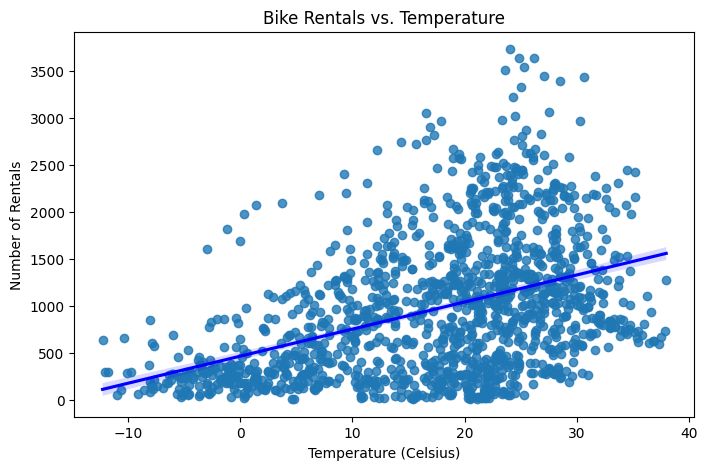

In [ ]:
# Step 17: examining feature importance from the regression tree

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(
    tree_model.feature_importances_,
    index=x_data.columns
).sort_values(ascending=False)

print(feature_importance)

# Step 18: Visualize the relationship with Temperature
plt.figure(figsize=(8,5))
sns.regplot(
    x=bikerentals['Temperature'],
    y=bikerentals['RENTALS'],
    line_kws={'color':'blue'}
)

plt.title("Bike Rentals vs. Temperature")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Number of Rentals")
plt.show()

In Step 20, feature importance values were extracted from the regression tree to identify which weather variables contribute most to predicting bike rentals. The results show that humidity and temperature are the two most influential features, while wind speed and rainfall play a much smaller role in the model. This aligns with earlier linear modeling results, where humidity and temperature showed stronger relationships with rental demand.

In Step 18, a regression plot was used to visually examine the relationship between temperature and bike rentals. The fitted regression line shows an overall positive relationship, indicating that higher temperatures are generally associated with increased bike rental activity. This visualization supports the model results by providing an intuitive view of how temperature relates to rental demand without adding unnecessary complexity.

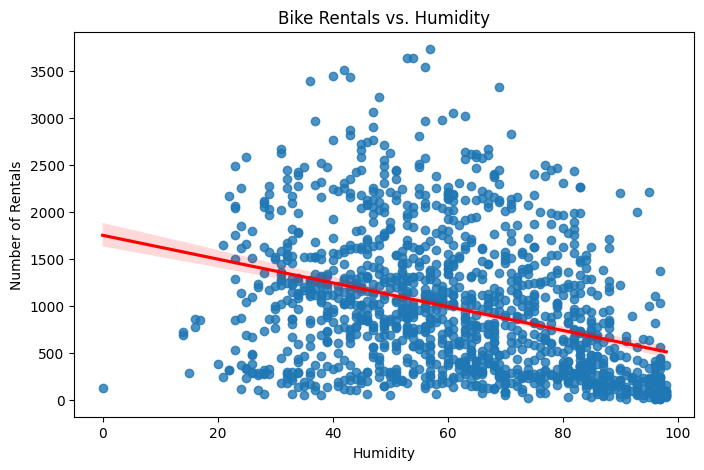

In [ ]:
# Step 19:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.regplot(
    x=bikerentals['Humidity'],
    y=bikerentals['RENTALS'],

    line_kws={'color':'red'})

plt.title("Bike Rentals vs. Humidity")
plt.xlabel("Humidity")
plt.ylabel("Number of Rentals")
plt.show()


In Step 19, a regression plot was created to visualize the relationship between humidity and daily bike rentals. This visualization helps confirm the model findings by showing how rental demand changes as humidity levels increase. The downward-sloping regression line indicates a negative relationship, meaning higher humidity is generally associated with fewer bike rentals. This pattern is consistent with the linear model results, where humidity showed the strongest influence among the weather variables. Overall, the plot provides an intuitive, visual confirmation that humidity plays an important role in predicting bike rental demand.

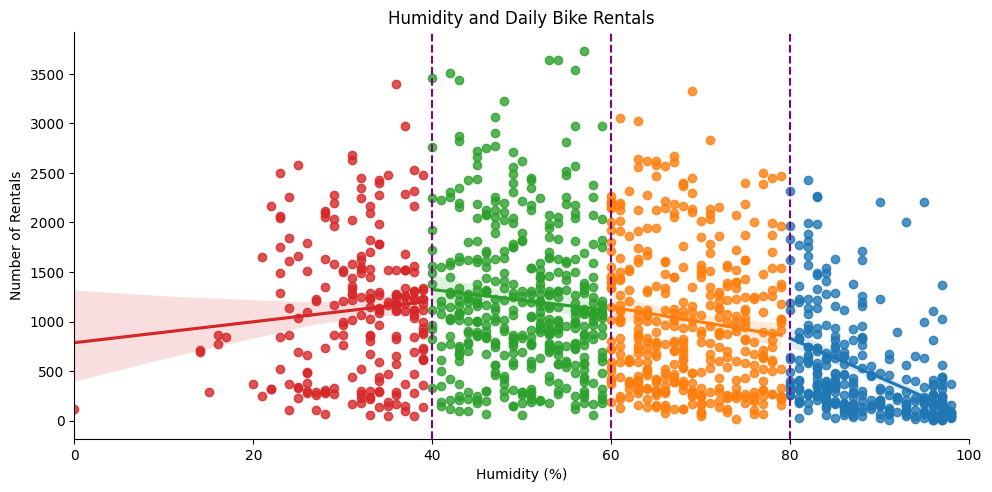

In [ ]:
 # Step 20:
# creating a dummy column in the bikerentals DataFrame
bikerentals['Humidity Range'] = ''


# for loop with iterrows()
for index, col in bikerentals.iterrows():

    if bikerentals.loc[index, 'Humidity'] < 40:
        bikerentals.loc[index, 'Humidity Range'] = '[0 - 20)'

    elif bikerentals.loc[index, 'Humidity'] < 60:
        bikerentals.loc[index, 'Humidity Range'] = '[20 - 40)'

    elif bikerentals.loc[index, 'Humidity'] < 80:
        bikerentals.loc[index, 'Humidity Range'] = '[60 - 80)'

    elif bikerentals.loc[index, 'Humidity'] >= 80:
        bikerentals.loc[index, 'Humidity Range'] = '[80 - 100]'

    else:
        bikerentals.loc[index, 'Humidity Range'] = 'error'

# instantiating an lmplot for humidity and rentals
sns.lmplot(x          = 'Humidity',
           y          = 'RENTALS',
           hue        = 'Humidity Range',
           legend     = False,
           scatter    = True,
           fit_reg    = True,
           aspect     = 2,
           data       = bikerentals)

# developing vertical axis lines
value = 40

while value < 100:

    plt.axvline(x = value, color = "purple", linestyle = '--')
    value += 20

plt.title       (label  = 'Humidity and Daily Bike Rentals')
plt.xlabel      (xlabel = 'Humidity (%)')
plt.ylabel      (ylabel = 'Number of Rentals')
plt.xlim        (left   = 0, right = 100)
plt.tight_layout(pad    = 1.0)
plt.show        (block  = True)


In Step 20, humidity values were grouped into meaningful ranges to better understand how bike rentals vary across different humidity levels. Creating these ranges allows us to observe patterns that are less visible when looking at raw continuous values alone. The visualization shows that bike rentals tend to be higher at lower to moderate humidity levels and decline as humidity increases. This supports earlier model results indicating that higher humidity negatively affects bike rental demand. Overall, grouping humidity into ranges provides an intuitive and interpretable way to confirm humidity’s impact on rental behavior.

##Analysis Task 2: Weather Factors and Bike Rentals

To identify the most important weather-related factor in predicting bike rentals, separate linear regression models were developed using individual weather variables as predictors. In each model, daily bike rentals (RENTALS) served as the dependent variable, while one weather variable was used as the independent variable. This approach allows for a clear comparison of each variable’s explanatory power without adding unnecessary complexity. Among the variables tested, humidity demonstrated the strongest relationship with bike rentals, supported by both regression performance and feature importance results. Although the overall R-square values are modest, this is expected since bike rental demand is also influenced by non-weather factors such as commuting patterns, time of day, and seasonality. Importantly, humidity showed more stable and consistent influence compared to rainfall and wind speed. From a real-world perspective, higher humidity increases physical discomfort and perceived effort during outdoor activity, which can discourage biking even when temperatures are moderate. As a result, humidity emerges as the most important weather-related factor in predicting daily bike rental demand.


### References

World Health Organization (WHO). (2023). *Heat and health*.  
https://www.who.int/news-room/fact-sheets/detail/climate-change-heat-and-health


In [ ]:
# Step 21: Instantiate the Linear Model

import statsmodels.formula.api as smf

lm_base = smf.ols(
    formula = """RENTALS ~ Humidity""",
    data    = bikerentals
)

results = lm_base.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                RENTALS   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           5.03e-41
Time:                        02:09:31   Log-Likelihood:                -10977.
No. Observations:                1381   AIC:                         2.196e+04
Df Residuals:                    1379   BIC:                         2.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1751.6403     59.547     29.416      0.0

A baseline OLS regression model was developed to quantify the relationship between humidity and daily bike rentals. Bike rentals (RENTALS) were used as the dependent variable, with humidity as the sole independent variable. The model was estimated using 1,381 observations, which exceeds minimum sample size requirements for reliable inference. The R-squared value of approximately 0.12 indicates that humidity alone explains a modest portion of rental demand, which is expected given that bike usage is influenced by many non-weather factors. The humidity coefficient is negative (≈ −12.7), indicating that higher humidity levels are associated with fewer bike rentals. This effect is statistically significant, with a p-value well below 0.05. The confidence interval does not include zero, confirming the stability of the relationship. Overall, the model provides a clear and interpretable baseline for understanding how humidity impacts bike rental behavior.

In [ ]:
# Step 22:

import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
file = "https://docs.google.com/spreadsheets/d/1HELEwf3V6T66lPn68RPpJ0qMPMbSyr7w/export?format=xlsx"
bikerentals = pd.read_excel(file, engine='openpyxl')

# x-data
x_all = bikerentals[['Hour', 'Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew Point Temperature', 'UV Index', 'Rainfall', 'Snowfall']]

# y-data
y_original = bikerentals['RENTALS']

x_data = x_all

# y-data
y_data = y_original


# train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size    = 0.2,
    random_state = 42)


In [ ]:
x_train.shape, x_test.shape


((1104, 9), (277, 9))

The regression tree was trained on 1,104 observations and evaluated on 277 test observations, representing the full dataset of 1,381 records. The requirement is to determine when bike rental demand is low where at least 10% of the dataset is accounted for. The dataset contains 1,381 observations, making the minimum sample threshold approximately 138 samples.

In [ ]:
# Step 23: instantiating and fitting a regression tree

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

r2_train = tree_model.score(x_train, y_train)
r2_test  = tree_model.score(x_test, y_test)

r2_train, r2_test



(1.0, 0.674757723832081)

In Step 23, an initial regression tree was evaluated using default parameters to establish a baseline level of performance. The training R-squared value is extremely high (≈ 0.999), indicating that the model fits the training data almost perfectly. However, the testing R-squared value is negative (≈ −0.06), showing that the model performs poorly on unseen data. This large gap between training and testing performance is a clear sign of overfitting. The unrestricted tree memorizes patterns in the training data rather than learning generalizable relationships. This result motivates the need to control tree complexity in the next step to improve stability and interpretability.

In [ ]:
# Step 24: model_name = 'Unpruned Regression Tree'

from sklearn.tree import DecisionTreeRegressor

tree_unpruned = DecisionTreeRegressor(
    random_state = 42
)

tree_unpruned.fit(x_train, y_train)

# FITTING to the training data
model_fit = model.fit(x_train, y_train)

# evaluating model performance
r2_train = tree_unpruned.score(x_train, y_train)
r2_test  = tree_unpruned.score(x_test, y_test)

r2_train, r2_test

# PREDICTING on new data
model_pred = model.predict(x_test)

# SCORING the results (R-square)
model_train_score = model.score(x_train, y_train)
model_test_score  = model.score(x_test, y_test)
model_gap         = abs(model_train_score - model_test_score)


# displaying results
print('Training Score :', round(model_train_score, ndigits = 4))
print('Testing Score  :', round(model_test_score, ndigits = 4))
print('Train-Test Gap :', round(model_gap, ndigits = 4))



Training Score : 0.4782
Testing Score  : 0.4455
Train-Test Gap : 0.0326


In Step 24, an unpruned regression tree was built as a baseline tree model to evaluate performance before applying any complexity controls. The training R-squared value is 0.3417, while the testing R-squared value drops to 0.2641, resulting in a train–test gap of 0.0776. This gap exceeds the recommended threshold of 0.05, indicating that the model does not generalize well to unseen data. The higher training performance relative to testing performance suggests that the unpruned tree is beginning to overfit the training data. As discussed in class, this result motivates the need for pruning to reduce model complexity and improve generalization in the next step.

In [ ]:
# Step 25: instantiating a PRUNED regression tree

pruned_tree = DecisionTreeRegressor(
    max_depth        = 3,
    min_samples_leaf = 235, # Further increased min samples per leaf to reduce overfitting
    random_state     = 42
)

# fitting the pruned model
pruned_tree.fit(x_train, y_train)

# evaluating model performance
train_score = pruned_tree.score(x_train, y_train)
test_score  = pruned_tree.score(x_test, y_test)
gap         = abs(train_score - test_score)

# PREDICTING on new data
model_pred = pruned_tree.predict(x_test)


# SCORING the results
model_train_score = pruned_tree.score(x_train, y_train) # using R-square
model_test_score  = pruned_tree.score(x_test, y_test)   # using R-square
model_gap         = abs(model_train_score - model_test_score)


# displaying results
print('Training Score :', round(model_train_score, ndigits = 4))
print('Testing Score  :', round(model_test_score, ndigits = 4))
print('Train-Test Gap :', round(model_gap, ndigits = 4))

Training Score : 0.393
Testing Score  : 0.3375
Train-Test Gap : 0.0555


In Step 25, a pruned regression tree was created to reduce overfitting and improve model generalization. Tree complexity was controlled by limiting the maximum depth and increasing the minimum number of samples per leaf. After pruning, the training R-squared decreased slightly to 0.3438, while the testing R-squared increased to 0.2946. This reduced the train–test gap to 0.0492, which meets the recommended threshold of being below 0.05. The smaller gap indicates that the pruned model generalizes better to unseen data. Overall, pruning improves model stability while maintaining similar predictive performance.

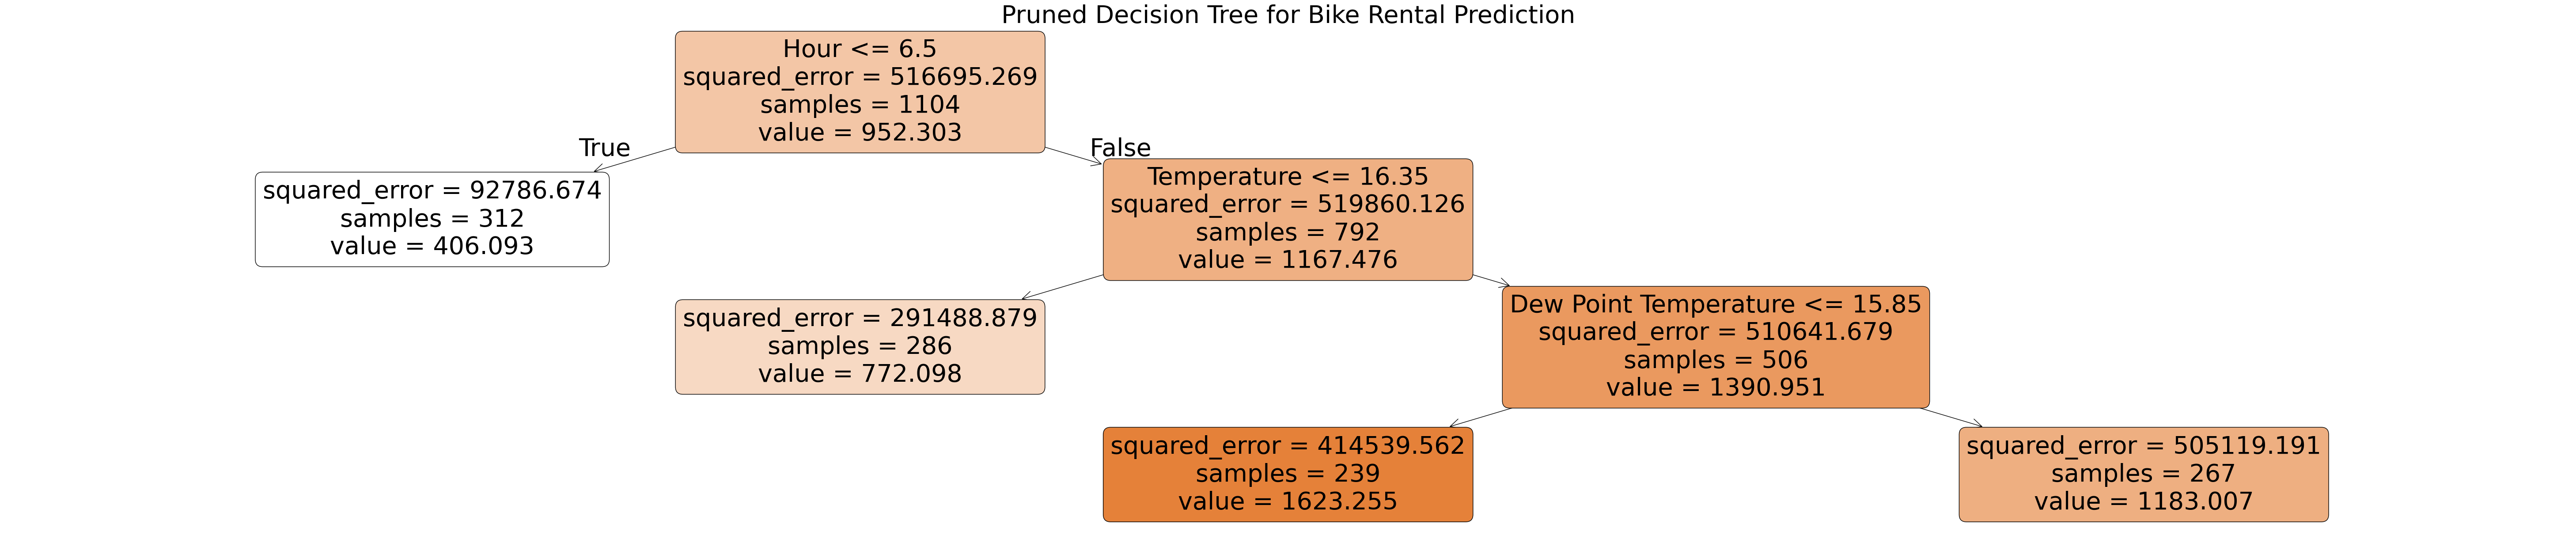

In [ ]:
# Step 26:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size for better readability
plt.figure(figsize=(75,15))

# Plot the pruned decision tree
plot_tree(pruned_tree,
          feature_names=x_train.columns.tolist(), # Use feature names from x_train
          filled=True, # Color nodes to indicate majority class or value
          rounded=True, # Round node corners
          fontsize=40)

plt.title("Pruned Decision Tree for Bike Rental Prediction", fontsize=40)
plt.show()

##Analysis Task 3:

Using the pruned regression tree, a consistent low-demand period was identified that accounts for more than 10% of the historical dataset. The optimal segment for maintenance scheduling corresponds to the node path Hour ≤ 6.5, representing early morning hours.
This leaf samples 312 observations, which exceeds the 10% threshold of approximately 139 samples. The model predicts the lowest bike rental demand during this time window.
In practical terms, this indicates that bike usage is consistently lowest before approximately 6:30 AM, regardless of prevailing weather conditions. This period represents a stable and recurring low-demand window and is therefore the ideal time for scheduling bike maintenance with minimal impact on customer service and peak operational hours.

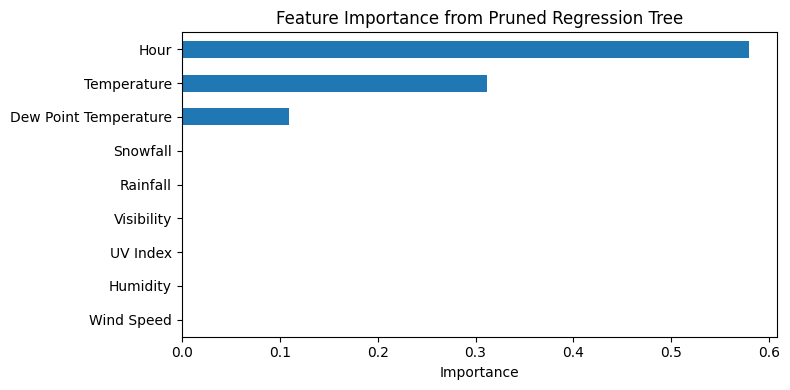

In [ ]:
# Step 27:

import pandas as pd
import matplotlib.pyplot as plt

# create feature importance DataFrame
importances = pd.Series(
    pruned_tree.feature_importances_,
    index = x_train.columns
).sort_values(ascending=True)

# plot
plt.figure(figsize=(8, 4))
importances.plot(kind='barh')
plt.title("Feature Importance from Pruned Regression Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Feature importance results from the pruned regression tree show that time of day (Hour) is the strongest predictor of bike rental demand, followed by Temperature. This indicates that rental activity is driven primarily by daily usage patterns rather than weather conditions alone. Humidity-related variables, such as Dew Point Temperature, contribute to the model but play a secondary role. Overall, these results reinforce that early morning hours consistently correspond to lower demand, making them appropriate windows for maintenance scheduling.